In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install wordcloud
%pip install missingno
%pip install nltk
%pip install -U scikit-learn scipy
%pip install tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 39.2 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 37.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 62.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 53.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 22.8 MB/s eta 0:00:00
Note: you may need 

In [2]:
%pip install textblob
%pip install accelerate -U
%pip install transformers
%pip install torch
%pip install pytorch-accelerated

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 5.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 751.2/751.2 kB 21.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 38.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.67.0
    Uninstalling tqdm-4.67.0:
      Successfully uninstalled tqdm-4.67.0
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.1.1
    Uninstalling accelerate-1.1.1:
      Successfully uninstalled accelerate-1.1.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
import json
import numpy as np
import pandas as pd
import re
import random
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer

import torch
from torch.utils.data import Dataset

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
from transformers import DistilBertTokenizerFast
from transformers import BertForSequenceClassification, BertTokenizerFast
from transformers import TFDistilBertForSequenceClassification, TFTrainingArguments
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig
from transformers import TrainingArguments, Trainer

from tensorflow.keras.utils import to_categorical

from nltk.corpus import stopwords

from textblob import TextBlob

from collections import Counter


2024-11-09 12:17:02.631894: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-09 12:17:02.641398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731133022.650848    7524 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731133022.653727    7524 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-09 12:17:02.664107: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [4]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print('GPU Available in MacOS')
elif torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU Available')
else:
    device = torch.device("cpu")
    print('GPU not Available')

GPU Available


In [5]:
def load_json_file(filename):
    with open(filename) as f:
        file = json.load(f)
    return file

filename = '../dataset/roberta-dataset.json'
intents = load_json_file(filename)

def create_df():
    df = pd.DataFrame({
        'Pattern' : [],
        'Tag' : []
    })

    return df

df = create_df()

In [6]:
def extract_json_info(json_file, df):
    for intent in json_file['intents']:
        for pattern in intent['patterns']:
            sentence_tag = [pattern, intent['tags']]
            df.loc[len(df.index)] = sentence_tag
    return df
df = extract_json_info(intents, df)

df.head()

,Pattern,Tag
0,whrerr are you exactly,Introduction
1,what your stats,Introduction
2,i live right down the road,Introduction
3,where in lb ru,Introduction
4,u have an address,Introduction


In [7]:
original_label_mapping = {
    8: 'AcknowledgeWrong',
    5: 'Activity',
    4: 'Compliment',
    2: 'Contact',
    12: 'ExpressFeeling',
    14: 'HotPhoto',
    15: 'IntroduceSexual',
    1: 'Introduction',
    11: 'LoveWords',
    17: 'Meeting',
    3: 'Photo',
    6: 'Relationship',
    7: 'Risk',
    16: 'SexualStage',
    13: 'SexualWords',
    9: 'Supervision',
    10: 'Trust',
    18: 'AcknowledgeAgeGap'
}

augmented_df = pd.read_csv('../dataset/augmented_sentences_with_label.csv')
augmented_df['Tag'] = augmented_df['Label'].map(original_label_mapping)
augmented_df.drop(columns=['Label'], inplace=True) 

df = pd.concat([df, augmented_df], ignore_index=True)

In [8]:
df.tail()

,Pattern,Tag
19605,when can we hang out at ur house?,Meeting
19606,wanna meet at your place for some fun?,Meeting
19607,what’s ur address so I can come over?,Meeting
19608,I can come over whenever you want,Meeting
19609,how about we just chill at your house?,Meeting


In [9]:
df.shape

(19610, 2)

In [10]:
df['Tag'] = df['Tag'].replace('SexualWords','SexualStage')
df['Tag'] = df['Tag'].replace('IntroduceSexual','SexualStage')
df['Tag'] = df['Tag'].replace('LoveWords','ExpressFeeling')
df['Tag'] = df['Tag'].replace('Supervision','Risk')

In [11]:
df.head(200)

,Pattern,Tag
0,whrerr are you exactly,Introduction
1,what your stats,Introduction
2,i live right down the road,Introduction
3,where in lb ru,Introduction
4,u have an address,Introduction
...,...,...
195,03 P.M.]: what is the address?,Introduction
196,"May I ask your Stats, Age and Location please.??",Introduction
197,where r u.?,Introduction
198,where in Arlington r u.?,Introduction


In [12]:
tag_counts = df.groupby('Tag').size().reset_index(name='Count')
print(tag_counts)

                  Tag  Count
0   AcknowledgeAgeGap   1366
1    AcknowledgeWrong   1676
2            Activity   1618
3          Compliment   1437
4             Contact   1534
5      ExpressFeeling   1004
6            HotPhoto    590
7        Introduction    466
8             Meeting   1520
9               Photo    859
10       Relationship   1264
11               Risk   1696
12        SexualStage   3369
13              Trust   1211


In [13]:
# Function to clean the sentence by removing unnecessary parts like timestamps
def clean_sentence(text):
    # Remove timestamps like "23 P.M.]:" or "9:30 A.M.:"
    cleaned_text = re.sub(r'^\[?\d{1,2}[:\d]*\s*[APM\.]*\]:?', '', text)  # Adjusted for time with hours and minutes
    cleaned_text = cleaned_text.strip()  # Remove leading/trailing whitespace
    return cleaned_text

# Apply the cleaning function to the 'Pattern' column
df['Pattern'] = df['Pattern'].apply(clean_sentence)

In [14]:
def print_shape_df(df, ds_name="df"):
    print(f"{ds_name} dataset has {df.shape[0]} rows and {df.shape[1]} columns")

print_shape_df(df, "Grooming")

Grooming dataset has 19610 rows and 2 columns


In [15]:
def print_dfInfo(df, ds_name="df"):
    print(f"The info of {ds_name} dataset\n")
    print(df.info())

print_dfInfo(df, "Grooming")

The info of Grooming dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19610 entries, 0 to 19609
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pattern  19610 non-null  object
 1   Tag      19610 non-null  object
dtypes: object(2)
memory usage: 306.5+ KB
None


In [16]:
def num_classes(df, target_col, ds_name="df"):
    print(f"The {ds_name} dataset has {len(df[target_col].unique())} classes")

num_classes(df, 'Tag', "Grooming")

The Grooming dataset has 14 classes


In [17]:
def check_null(df, ds_name='df'):
    print(f"Null Values in each col in the {ds_name} dataset:\n")
    print(df.isnull().sum())

check_null(df, "Grooming")

Null Values in each col in the Grooming dataset:

Pattern    0
Tag        0
dtype: int64


In [18]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text

    plt.show()

/tmp/ipykernel_7524/1620277688.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)


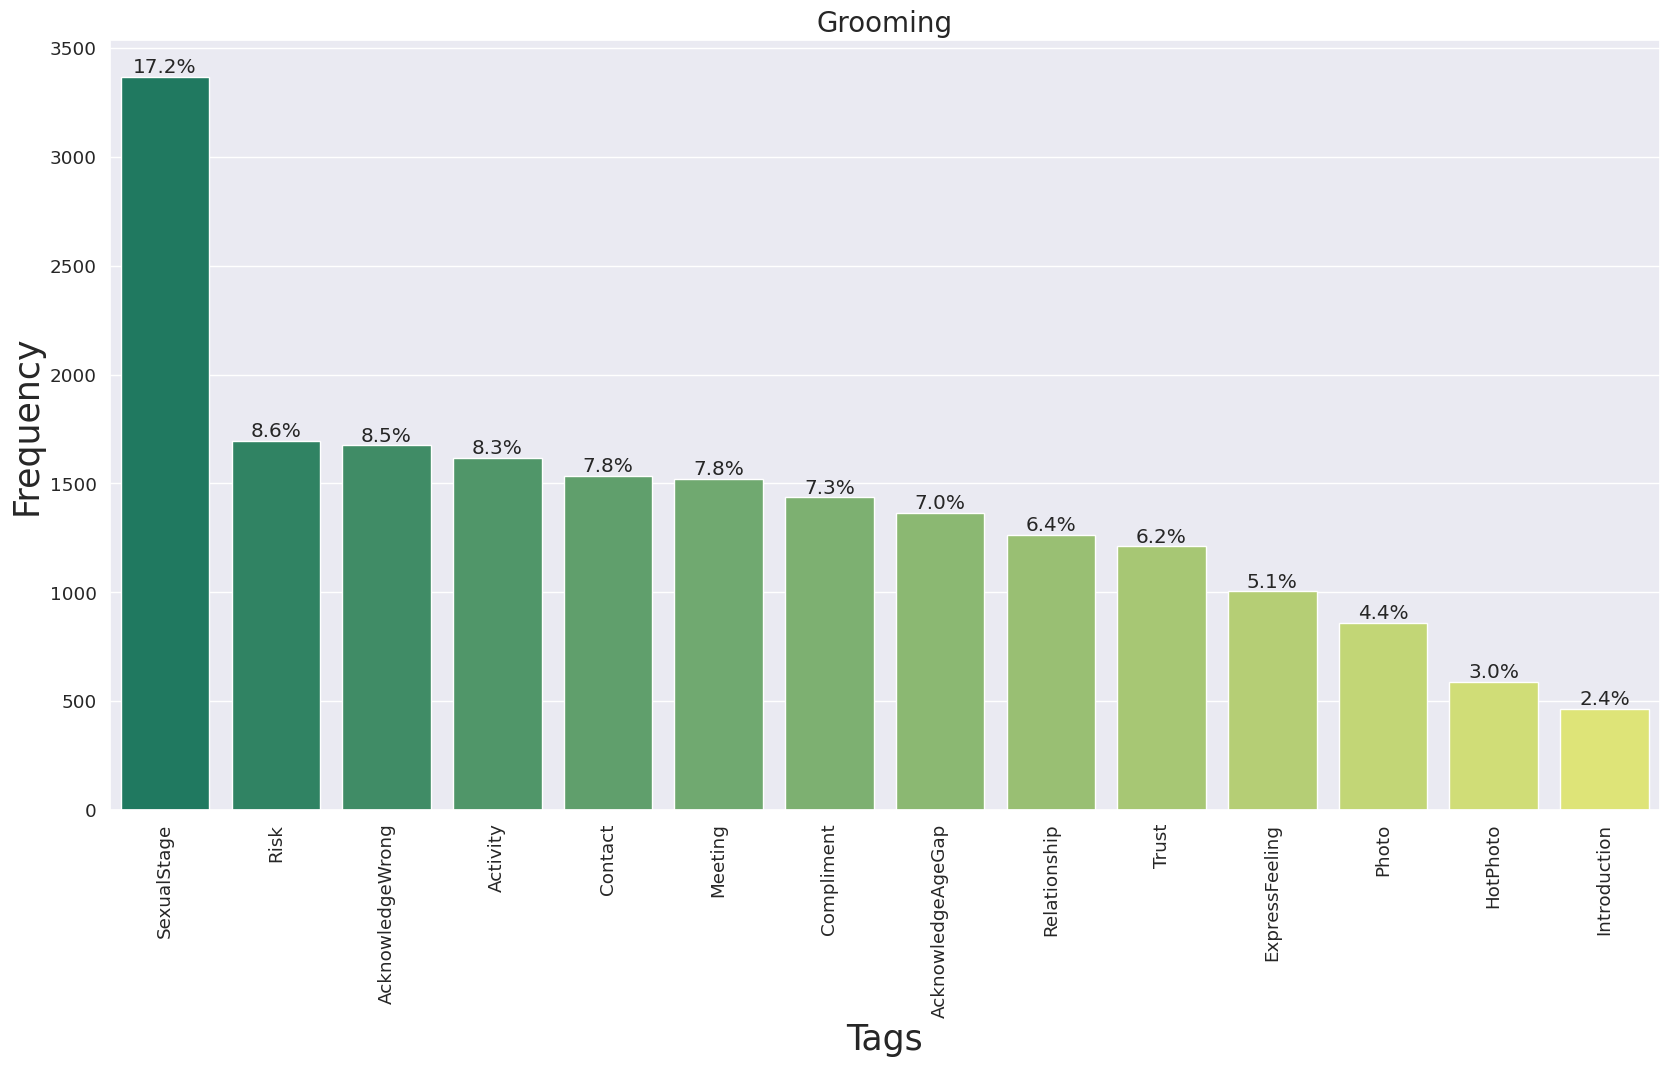

In [19]:
sns.set(font_scale = 1.2)
order = df['Tag'].value_counts().index
count_plot(df['Tag'], df, "Grooming", "Tags", "Frequency", 20,10, order=order,rotation=True, palette="summer")

In [20]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/farhan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /home/farhan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# stemmer = PorterStemmer()
# ignore_words=['?', '!', ',', '.']

# def preprocess_pattern(pattern):
#     words = word_tokenize(pattern.lower())
#     stemmed_words = [stemmer.stem(word) for word in words if word not in ignore_words]
#     return " ".join(stemmed_words)

# df['Pattern'] = df['Pattern'].apply(preprocess_pattern)

In [22]:
df.head()

,Pattern,Tag
0,whrerr are you exactli,Introduction
1,what your stat,Introduction
2,i live right down the road,Introduction
3,where in lb ru,Introduction
4,u have an address,Introduction


In [23]:
def remove_emojis(text) :
  pattern = r'(:+\)+|:-+\)+|:\(+|:-+\(+|:D+|:p+|:P+|:3+|:o+|:O+|:0+|8-+\)+|8\)+|=\(+|=\)+|:\*+|:\^+|\^\^+|\^\_\^+|\^\.\^+|\^\-\^+|\^\_\^+|\,:\,+|\.-\.+|<3+|T\.T+|TT+|T_T+)'
  return re.sub(pattern, '', text)

df['Pattern'] = df['Pattern'].apply(remove_emojis)

In [24]:
def normalize_punctuation(text):
    clean_text = re.sub(r'[:;"]', '', text)
    return clean_text

# Apply the function to your dataset
df['Pattern'] = df['Pattern'].apply(normalize_punctuation)

In [ ]:
nltk.download('stopwords')

# Get the list of stopwords in English
# stop_words = set(stopwords.words('english'))


stop_words = [
   'am' , 'is' ,'are' , 'was' , 'were' , 'the' , 'an' , 'a' , 'am' , 'pm' , 'you' , 'I' , 'i' , 'to' , 'your' , 'and' , 'me','do','have' ,'in' ,'so' ,'can' , 'it'
   , 'if' ,'would' , 'of' , 'on' , 'that' , 'for' ,'na' ,'or' ,'ok'
]




# Step 1: Define a custom dictionary for slang/abbreviation replacement
custom_dict = {
    'pic': 'picture',
    'pls': 'please',
    'u': 'you',
    'ur': 'your',
    'r': 'are',
    'usely' : 'usually',
    'pix' : 'picture' ,
    # Add more slang/abbreviations as needed
}

# Function to replace slang using the custom dictionary
def replace_slang(text, custom_dict):
    words = text.split()  # Split the sentence into words
    corrected_text = ' '.join([custom_dict[word] if word in custom_dict else word for word in words])
    return corrected_text

# # Function to remove stopwords from a sentence
# def remove_stopwords(text):
#     return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Function to correct spelling using TextBlob
def correct_spelling(text):
    corrected_text = str(TextBlob(text).correct())
    return corrected_text

# Function to combine slang replacement, spelling correction, and stopword removal
def preprocess_text(text):
    text = replace_slang(text, custom_dict)  # Step 1: Replace slang/abbreviations
    text = correct_spelling(text)  # Step 2: Correct spelling
    # text = remove_stopwords(text)  # Step 3: Remove stopwords
    return text

# Apply preprocessing to the 'Pattern' column
df['Pattern'] = df['Pattern'].apply(preprocess_text)

# Remove rows with empty 'Pattern' (in case all words are removed after preprocessing)
df = df[df['Pattern'].str.strip() != '']

[nltk_data] Downloading package stopwords to /home/farhan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function to remove numbers from a given text
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Apply the function to remove numbers from the 'Pattern' column
# df['Pattern'] = df['Pattern'].apply(remove_numbers)

In [27]:
df.head(200)

,Pattern,Tag
0,where are you exactly,Introduction
1,what your state,Introduction
2,i live right down the road,Introduction
3,where in lb re,Introduction
4,you have an address,Introduction
...,...,...
195,what is the address,Introduction
196,may i ask your state age and local please.,Introduction
197,where are u.,Introduction
198,where in darlington are u.,Introduction


In [28]:
print(df['Pattern'].isnull().sum())

0


In [29]:
tag_counts = df.groupby('Tag').size().reset_index(name='Count')
print(tag_counts)

                  Tag  Count
0   AcknowledgeAgeGap   1366
1    AcknowledgeWrong   1676
2            Activity   1618
3          Compliment   1437
4             Contact   1534
5      ExpressFeeling   1004
6            HotPhoto    590
7        Introduction    466
8             Meeting   1520
9               Photo    859
10       Relationship   1263
11               Risk   1695
12        SexualStage   3369
13              Trust   1211


In [30]:
def get_corpus(series):
    words = []
    for text in series:
        for word in text.split():
            words.append(word.strip())
    return words

corpus = get_corpus(df.Pattern)
corpus[:5]

['where', 'are', 'you', 'exactly', 'what']

In [31]:
print(f"dataset contains {len(corpus)} words")

dataset contains 164154 words


In [32]:
counter = Counter(corpus)
most_common = counter.most_common(30)
most_common = dict(most_common)
most_common

{'you': 12710,
 'i': 6984,
 'your': 6566,
 'to': 4658,
 'do': 4482,
 'a': 3227,
 'me': 2343,
 'what': 2303,
 'the': 2229,
 'and': 1981,
 'in': 1847,
 'can': 1830,
 'have': 1778,
 'it': 1764,
 'like': 1633,
 "'s": 1618,
 'with': 1611,
 'how': 1506,
 'are': 1476,
 'so': 1399,
 'feel': 1359,
 'of': 1314,
 'is': 1259,
 'for': 1254,
 'we': 1236,
 "n't": 1228,
 'be': 1209,
 'picture': 1198,
 'about': 1167,
 'na': 1121}

In [33]:
def get_top_text_ngrams(corpus, n,g):
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [34]:
labels = df['Tag'].unique().tolist()
labels = [s.strip() for s in labels]
labels

['Introduction',
 'Contact',
 'Photo',
 'Compliment',
 'Activity',
 'Relationship',
 'Risk',
 'AcknowledgeWrong',
 'Trust',
 'ExpressFeeling',
 'SexualStage',
 'HotPhoto',
 'Meeting',
 'AcknowledgeAgeGap']

In [35]:
num_labels = len(labels)
id2label = {id:label for id, label in enumerate(labels)}
label2id = {label:id for id, label in enumerate(labels)}

In [36]:
id2label

{0: 'Introduction',
 1: 'Contact',
 2: 'Photo',
 3: 'Compliment',
 4: 'Activity',
 5: 'Relationship',
 6: 'Risk',
 7: 'AcknowledgeWrong',
 8: 'Trust',
 9: 'ExpressFeeling',
 10: 'SexualStage',
 11: 'HotPhoto',
 12: 'Meeting',
 13: 'AcknowledgeAgeGap'}

In [37]:
label2id

{'Introduction': 0,
 'Contact': 1,
 'Photo': 2,
 'Compliment': 3,
 'Activity': 4,
 'Relationship': 5,
 'Risk': 6,
 'AcknowledgeWrong': 7,
 'Trust': 8,
 'ExpressFeeling': 9,
 'SexualStage': 10,
 'HotPhoto': 11,
 'Meeting': 12,
 'AcknowledgeAgeGap': 13}

In [38]:
df['labels'] = df['Tag'].map(lambda x: label2id[x.strip()])
df.head()

,Pattern,Tag,labels
0,where are you exactly,Introduction,0
1,what your state,Introduction,0
2,i live right down the road,Introduction,0
3,where in lb re,Introduction,0
4,you have an address,Introduction,0


In [39]:
X = list(df['Pattern'])
X[:5]

['where are you exactly',
 'what your state',
 'i live right down the road',
 'where in lb re',
 'you have an address']

In [40]:
y = list(df['labels'])
y[:5]

[0, 0, 0, 0, 0]

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 123)

In [ ]:
import transformers
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = 'microsoft/deberta-base'

# Load the DeBERTa tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id
).to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_encoding = tokenizer(X_train, truncation=True, padding=True)
test_encoding = tokenizer(X_test, truncation=True, padding=True)


In [ ]:
full_data = tokenizer(X, truncation=True, padding=True)

In [ ]:
class DataLoader(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataloader = DataLoader(train_encoding, y_train)
test_dataloader = DataLoader(test_encoding, y_test)

In [ ]:
fullDataLoader = DataLoader(full_data, y_test)

In [48]:
def compute_metrics(pred):

    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)

    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./outputs',
    do_train=True,
    do_eval=True,
    num_train_epochs=20,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=16,
    warmup_steps=100,
    weight_decay=0.05,
    logging_strategy='steps',
    logging_dir='./logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    load_best_model_at_end=True
)

/home/farhan/research/.venv/lib/python3.10/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [50]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataloader,
    eval_dataset=test_dataloader,
    compute_metrics= compute_metrics,
)

In [51]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,2.576600,2.168084,0.318033,0.178648,0.332262,0.211947
100,1.398200,0.795151,0.773154,0.712456,0.771622,0.730653
150,0.670300,0.550902,0.841901,0.812024,0.844797,0.799816
200,0.603200,0.446427,0.872909,0.857522,0.863972,0.860619
250,0.502300,0.440014,0.864137,0.842080,0.864169,0.843896
300,0.438600,0.402043,0.888413,0.866601,0.867567,0.874295
350,0.420700,0.376459,0.894329,0.884712,0.891922,0.886937
400,0.380200,0.362645,0.902081,0.890678,0.889813,0.895152
450,0.359900,0.364677,0.902897,0.894442,0.894929,0.897134
500,0.322700,0.312210,0.920645,0.910138,0.914817,0.908276


/home/farhan/research/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KeyboardInterrupt: 

In [56]:
q=[trainer.evaluate(eval_dataset=df) for df in [train_dataloader, test_dataloader]]

pd.DataFrame(q, index=["train","test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.069394,0.979260,0.972813,0.969538,0.977958
test,0.301635,0.931661,0.926288,0.922491,0.933451


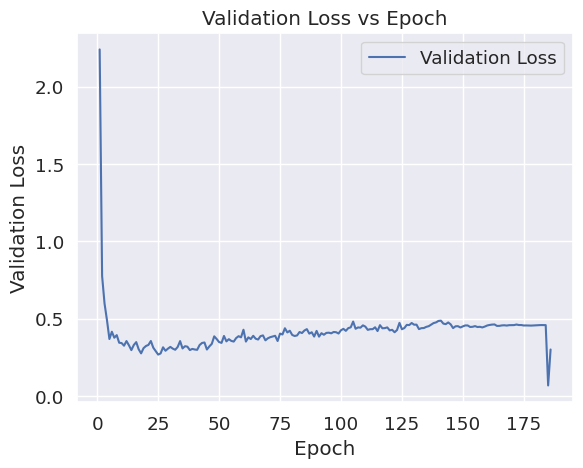

In [57]:
train_hist = trainer.state.log_history
val_loss = [eval_log['eval_loss'] for eval_log in train_hist if 'eval_loss' in eval_log]

plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Validation Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [ ]:
model_path = "./trained-model/deberta-base-grooming-trained-7.8k"
trainer.save_model(model_path) 
tokenizer.save_pretrained(model_path)  

('./trained-model/roberta-base-grooming-trained-7.8k/tokenizer_config.json',
 './trained-model/roberta-base-grooming-trained-7.8k/special_tokens_map.json',
 './trained-model/roberta-base-grooming-trained-7.8k/vocab.json',
 './trained-model/roberta-base-grooming-trained-7.8k/merges.txt',
 './trained-model/roberta-base-grooming-trained-7.8k/added_tokens.json')

In [ ]:
# from transformers import RobertaForSequenceClassification, RobertaTokenizerFast, pipeline

# model_path = "./trained-model/roberta-base-grooming-trained"
# model = RobertaForSequenceClassification.from_pretrained(model_path).to(torch.device('cuda'))
# tokenizer = RobertaTokenizerFast.from_pretrained(model_path)

# classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [ ]:
# classifier("i will teach you how to pleasure yourself")

[{'label': 'SexualStage', 'score': 0.9962272644042969}]

In [ ]:
# classifier("you are younger than me")

[{'label': 'AcknowledgeAgeGap', 'score': 0.7299229502677917}]